# MLP
Cell line 06 MCF.7

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was never a learn fail during CV.

MCC mean 0.2561

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 16:36:06.945291


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=6]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]


2023-04-29 16:36:09.470422
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 2362
Num RCI: 2362
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 2362 sequences.

Training # 1 1
2023-04-29 16:36:16.933954
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-0.10659443079062562, -3.262783578416522]
Variances [2.18957812 2.659716  ]
Priors [0.53299821 0.46700179]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1033:864 54.45%
Computed class weights: {0: 1.0978009259259258, 1: 0.9181994191674734}
Valid 1:0 259:206 55.70%
FIT


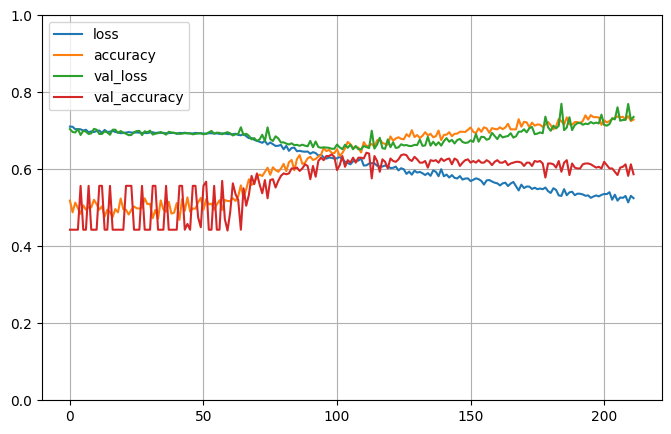


Testing # 1 1
2023-04-29 16:37:30.878754
PREDICT
Test 1:0 259:206 55.70%
Predict 1:0 239:226 51.40%
Test sizes (465, 1025) (465,)
Distrib of scores: 0.52924436 mean 0.18623361 std
Range of scores: 0.09947276 to 0.9056273
Score threshold 0.5
Confusion matrix
 [[133  73]
 [ 93 166]]
Normalized matrix
 [[0.28602151 0.15698925]
 [0.2        0.35698925]]
Extreme scores correct, pos:neg 92 52
Extreme scores incorrect pos:neg 37 31


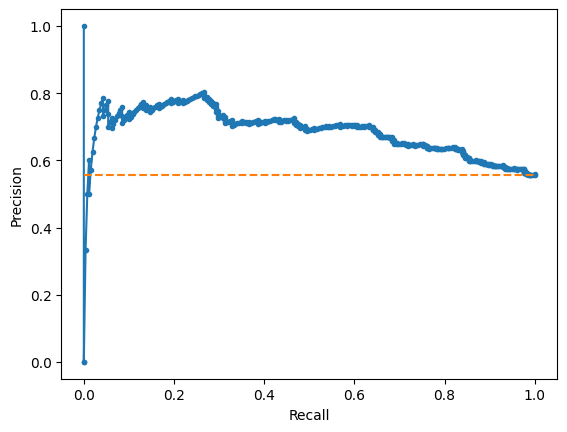

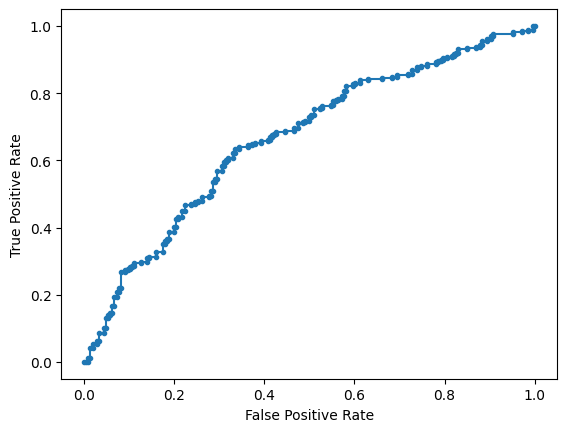

Accuracy: 64.30% Precision: 69.46% Recall: 64.09%
F1: 66.67% MCC: 0.2848
AUPRC: 68.51% AUROC: 66.49%
 accuracy [64.30107526881721]
 precision [69.4560669456067]
 recall [64.0926640926641]
 F1 [66.66666666666666]
 MCC [0.28480159578400366]
 AUPRC [68.51449424793685]
 AUROC [66.49360872661843]

Training # 1 2
2023-04-29 16:37:31.523268
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-0.1659860452327749, -3.254232250860047]
Variances [2.14570156 2.65492601]
Priors [0.54245685 0.45754315]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1047:823 55.99%
Computed class weights: {0: 1.1360874848116647, 1: 0.8930276981852913}
Valid 1:0 271:221 55.08%
FIT


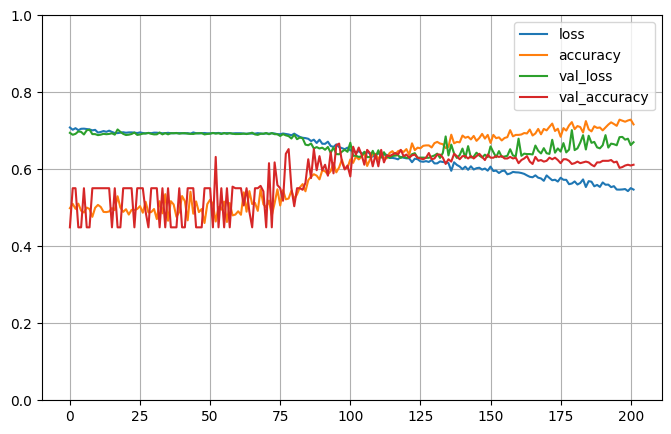


Testing # 1 2
2023-04-29 16:38:55.653637
PREDICT
Test 1:0 271:221 55.08%
Predict 1:0 235:257 47.76%
Test sizes (492, 1025) (492,)
Distrib of scores: 0.5195709 mean 0.12753633 std
Range of scores: 0.2848744 to 0.8456425
Score threshold 0.5
Confusion matrix
 [[155  66]
 [102 169]]
Normalized matrix
 [[0.31504065 0.13414634]
 [0.20731707 0.34349593]]
Extreme scores correct, pos:neg 67 21
Extreme scores incorrect pos:neg 16 5


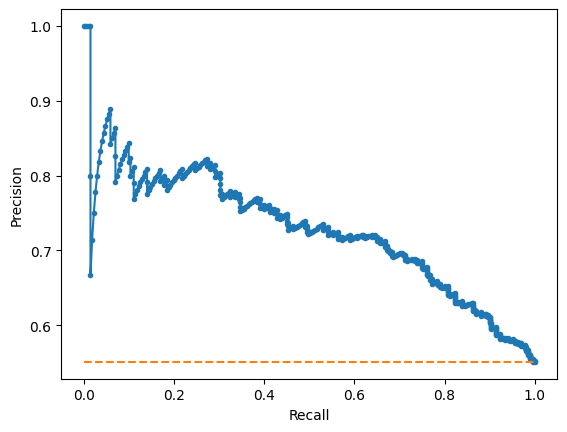

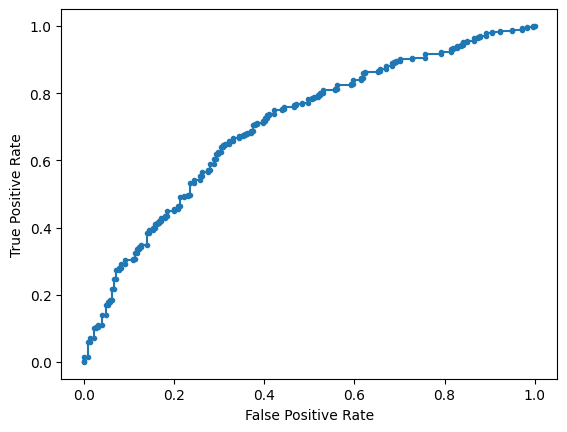

Accuracy: 65.85% Precision: 71.91% Recall: 62.36%
F1: 66.80% MCC: 0.3236
AUPRC: 72.73% AUROC: 70.41%
 accuracy [65.85365853658537]
 precision [71.91489361702128]
 recall [62.36162361623616]
 F1 [66.79841897233202]
 MCC [0.32361489866754567]
 AUPRC [72.73450221712288]
 AUROC [70.40623799903159]

Training # 1 3
2023-04-29 16:38:56.227013
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-0.16434176482297028, -3.2804461230192743]
Variances [2.2508108  2.65343289]
Priors [0.5620916 0.4379084]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1092:792 57.96%
Computed class weights: {0: 1.1893939393939394, 1: 0.8626373626373627}
Valid 1:0 249:229 52.09%
FIT


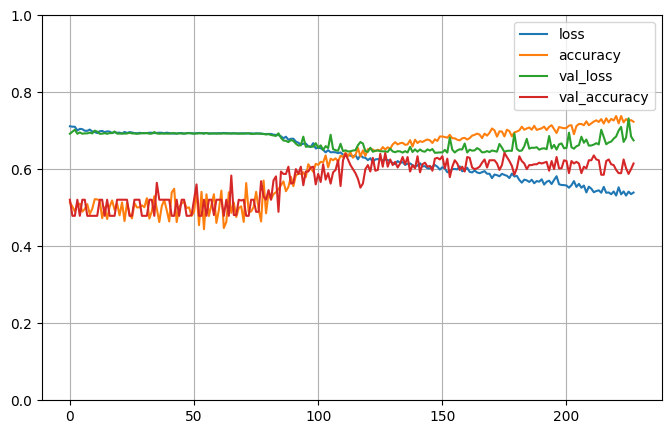


Testing # 1 3
2023-04-29 16:40:20.765753
PREDICT
Test 1:0 249:229 52.09%
Predict 1:0 292:186 61.09%
Test sizes (478, 1025) (478,)
Distrib of scores: 0.5544952 mean 0.1428401 std
Range of scores: 0.13388172 to 0.8926025
Score threshold 0.5
Confusion matrix
 [[122 107]
 [ 64 185]]
Normalized matrix
 [[0.25523013 0.22384937]
 [0.13389121 0.38702929]]
Extreme scores correct, pos:neg 79 24
Extreme scores incorrect pos:neg 37 5


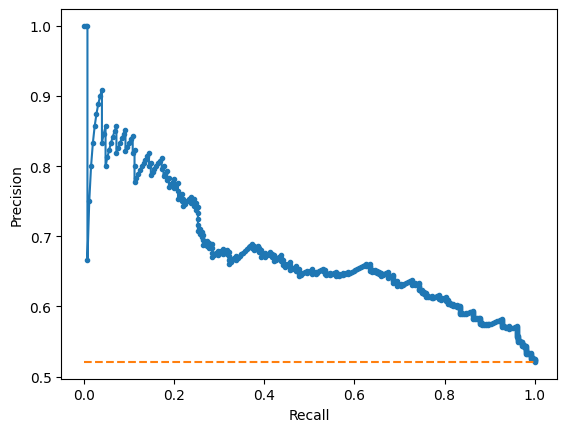

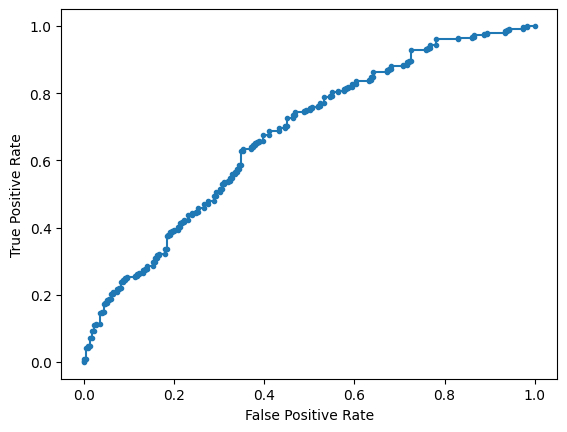

Accuracy: 64.23% Precision: 63.36% Recall: 74.30%
F1: 68.39% MCC: 0.2825
AUPRC: 67.78% AUROC: 67.46%
 accuracy [64.22594142259415]
 precision [63.35616438356164]
 recall [74.29718875502009]
 F1 [68.39186691312385]
 MCC [0.2825156296739786]
 AUPRC [67.78337384624493]
 AUROC [67.4646182985216]

Training # 1 4
2023-04-29 16:40:21.621330
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-0.08401182279818271, -3.2187206689789845]
Variances [2.1741316  2.57420711]
Priors [0.52266443 0.47733557]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1027:889 53.60%
Computed class weights: {0: 1.077615298087739, 1: 0.9328140214216164}
Valid 1:0 248:198 55.61%
FIT


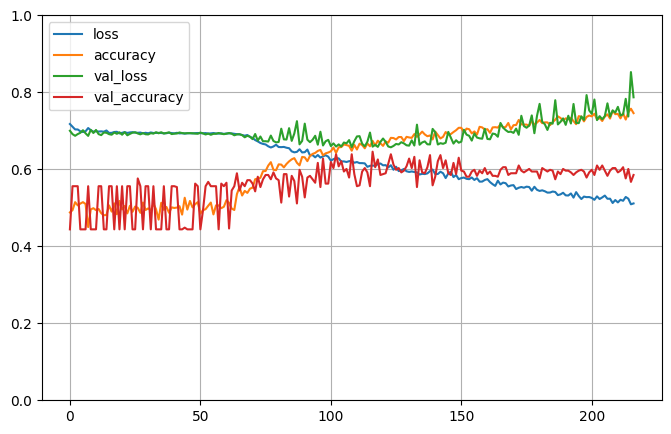


Testing # 1 4
2023-04-29 16:41:47.169731
PREDICT
Test 1:0 248:198 55.61%
Predict 1:0 300:146 67.26%
Test sizes (446, 1025) (446,)
Distrib of scores: 0.5730788 mean 0.15910545 std
Range of scores: 0.16792648 to 0.894395
Score threshold 0.5
Confusion matrix
 [[ 93 105]
 [ 53 195]]
Normalized matrix
 [[0.20852018 0.23542601]
 [0.11883408 0.43721973]]
Extreme scores correct, pos:neg 95 26
Extreme scores incorrect pos:neg 49 13


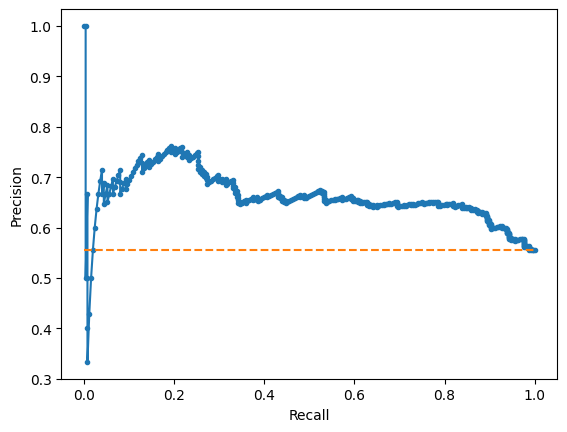

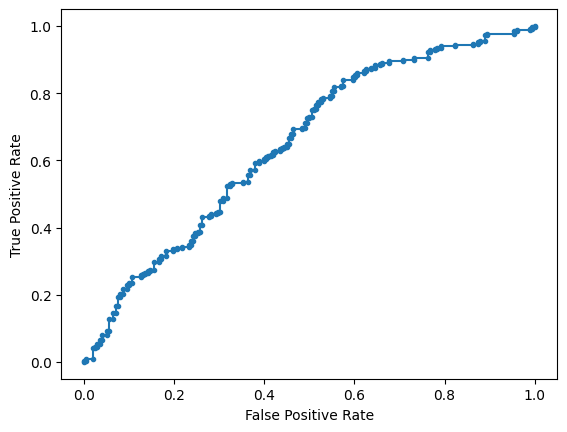

Accuracy: 64.57% Precision: 65.00% Recall: 78.63%
F1: 71.17% MCC: 0.2710
AUPRC: 66.16% AUROC: 64.94%
 accuracy [64.57399103139014]
 precision [65.0]
 recall [78.62903225806451]
 F1 [71.16788321167884]
 MCC [0.27104399312369715]
 AUPRC [66.16112159936817]
 AUROC [64.94175627240143]

Training # 1 5
2023-04-29 16:41:47.826290
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-3.301582265038681, -0.17494401409996785]
Variances [2.57363581 2.16592148]
Priors [0.46924497 0.53075503]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1024:857 54.44%
Computed class weights: {0: 1.0974329054842473, 1: 0.91845703125}
Valid 1:0 286:195 59.46%
FIT


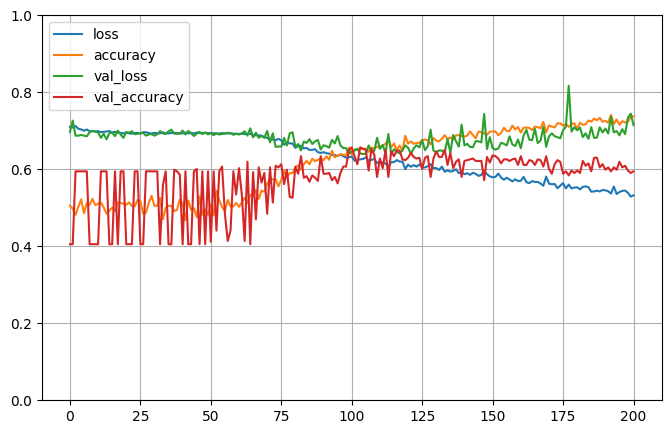


Testing # 1 5
2023-04-29 16:42:55.265237
PREDICT
Test 1:0 286:195 59.46%
Predict 1:0 273:208 56.76%
Test sizes (481, 1025) (481,)
Distrib of scores: 0.5407599 mean 0.14047872 std
Range of scores: 0.22967678 to 0.8696302
Score threshold 0.5
Confusion matrix
 [[119  76]
 [ 89 197]]
Normalized matrix
 [[0.24740125 0.15800416]
 [0.18503119 0.40956341]]
Extreme scores correct, pos:neg 96 17
Extreme scores incorrect pos:neg 25 13


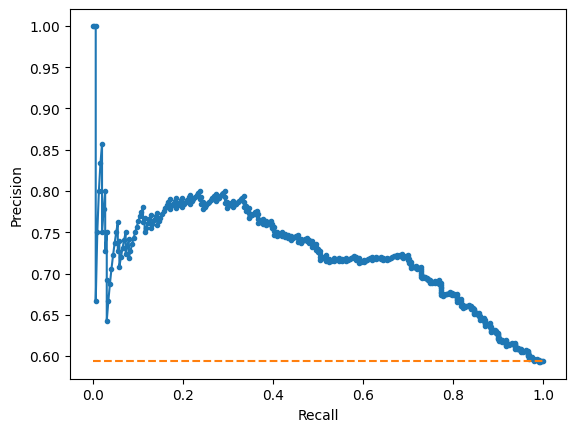

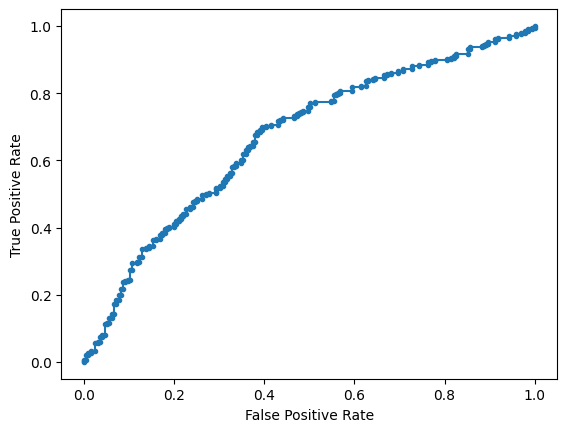

Accuracy: 65.70% Precision: 72.16% Recall: 68.88%
F1: 70.48% MCC: 0.2964
AUPRC: 72.24% AUROC: 66.76%
 accuracy [65.6964656964657]
 precision [72.16117216117216]
 recall [68.88111888111888]
 F1 [70.48300536672629]
 MCC [0.29638532426625697]
 AUPRC [72.24392085349291]
 AUROC [66.75811368119061]

Training # 2 1
2023-04-29 16:42:55.899949
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-3.246957513924103, -0.13962360207083369]
Variances [2.61255001 2.17863465]
Priors [0.45265807 0.54734193]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1060:819 56.41%
Computed class weights: {0: 1.147130647130647, 1: 0.8863207547169811}
Valid 1:0 255:228 52.80%
FIT


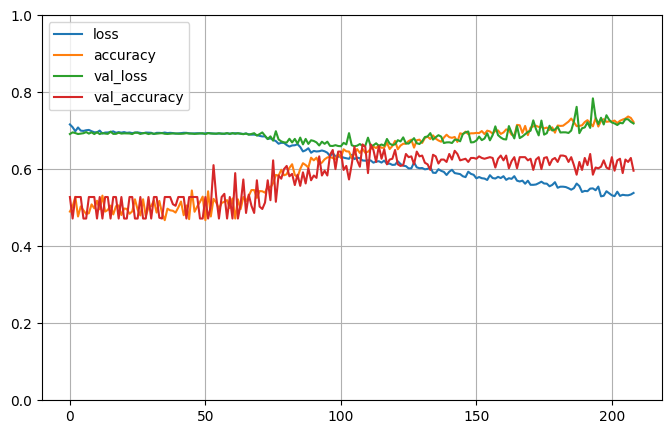


Testing # 2 1
2023-04-29 16:44:06.472258
PREDICT
Test 1:0 255:228 52.80%
Predict 1:0 243:240 50.31%
Test sizes (483, 1025) (483,)
Distrib of scores: 0.5270294 mean 0.16114429 std
Range of scores: 0.18839711 to 0.88489044
Score threshold 0.5
Confusion matrix
 [[153  75]
 [ 87 168]]
Normalized matrix
 [[0.31677019 0.1552795 ]
 [0.18012422 0.34782609]]
Extreme scores correct, pos:neg 77 37
Extreme scores incorrect pos:neg 33 22


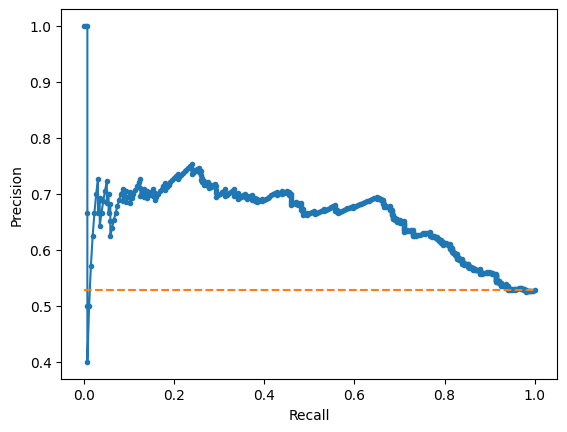

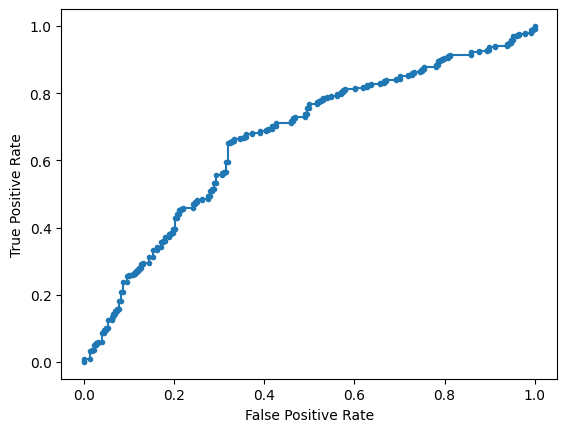

Accuracy: 66.46% Precision: 69.14% Recall: 65.88%
F1: 67.47% MCC: 0.3294
AUPRC: 66.03% AUROC: 66.39%
 accuracy [66.45962732919256]
 precision [69.1358024691358]
 recall [65.88235294117646]
 F1 [67.46987951807229]
 MCC [0.32936669943419294]
 AUPRC [66.02667142333753]
 AUROC [66.39146886824905]

Training # 2 2
2023-04-29 16:44:07.106289
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-3.221395488681262, -0.12881917936174933]
Variances [2.63973185 2.20616538]
Priors [0.46724429 0.53275571]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1031:854 54.69%
Computed class weights: {0: 1.1036299765807962, 1: 0.914161008729389}
Valid 1:0 260:217 54.51%
FIT


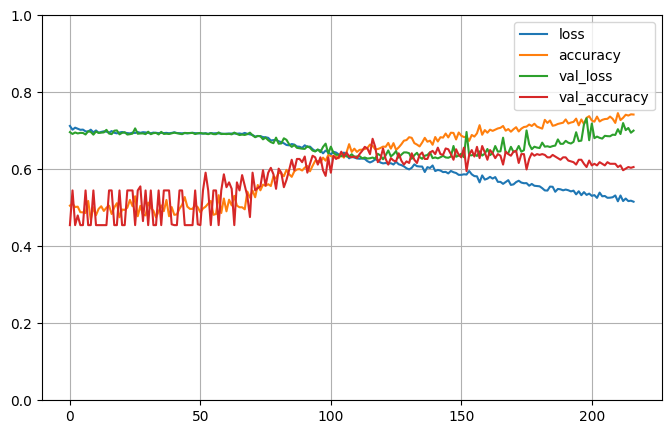


Testing # 2 2
2023-04-29 16:45:22.551391
PREDICT
Test 1:0 260:217 54.51%
Predict 1:0 331:146 69.39%
Test sizes (477, 1025) (477,)
Distrib of scores: 0.58438784 mean 0.146435 std
Range of scores: 0.19792847 to 0.904992
Score threshold 0.5
Confusion matrix
 [[105 112]
 [ 41 219]]
Normalized matrix
 [[0.22012579 0.23480084]
 [0.08595388 0.4591195 ]]
Extreme scores correct, pos:neg 116 18
Extreme scores incorrect pos:neg 42 2


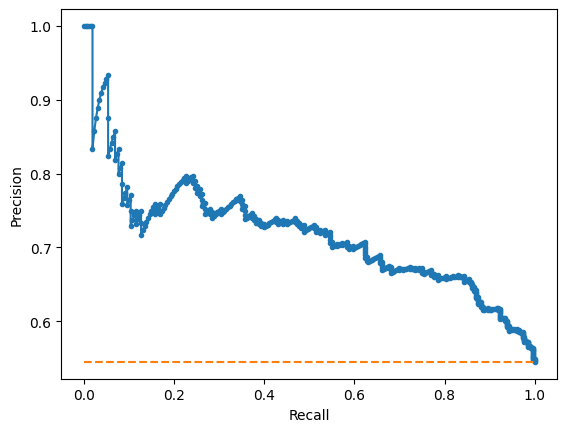

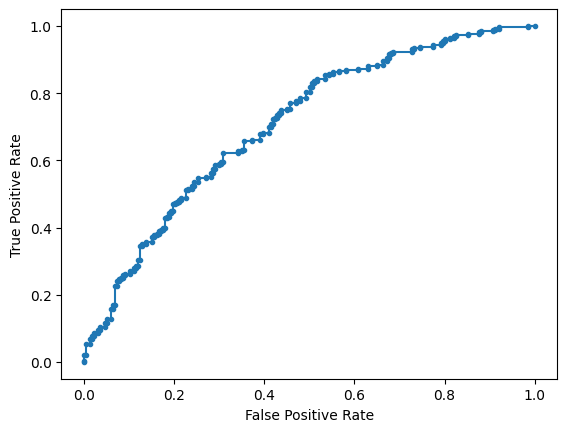

Accuracy: 67.92% Precision: 66.16% Recall: 84.23%
F1: 74.11% MCC: 0.3524
AUPRC: 71.78% AUROC: 70.70%
 accuracy [67.9245283018868]
 precision [66.16314199395771]
 recall [84.23076923076923]
 F1 [74.11167512690355]
 MCC [0.35243713359884793]
 AUPRC [71.78111774158624]
 AUROC [70.69656150301313]

Training # 2 3
2023-04-29 16:45:23.424495
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-3.3076269081148233, -0.1785331505310603]
Variances [2.56835981 2.15598532]
Priors [0.46752968 0.53247032]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1017:848 54.53%
Computed class weights: {0: 1.0996462264150944, 1: 0.9169124877089478}
Valid 1:0 298:199 59.96%
FIT


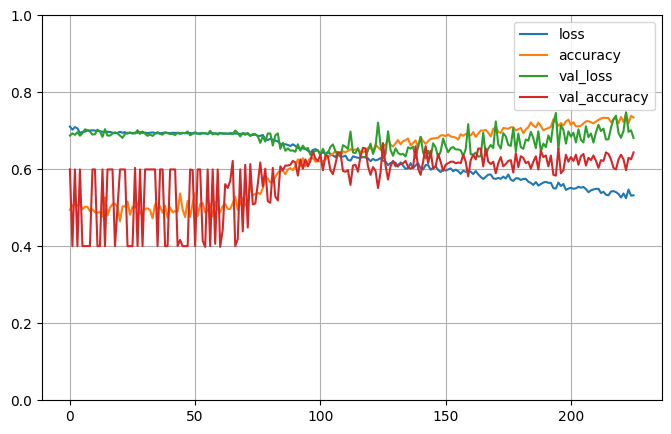


Testing # 2 3
2023-04-29 16:46:38.365999
PREDICT
Test 1:0 298:199 59.96%
Predict 1:0 357:140 71.83%
Test sizes (497, 1025) (497,)
Distrib of scores: 0.5921202 mean 0.14767799 std
Range of scores: 0.111164406 to 0.86475194
Score threshold 0.5
Confusion matrix
 [[ 87 112]
 [ 53 245]]
Normalized matrix
 [[0.1750503  0.22535211]
 [0.10663984 0.49295775]]
Extreme scores correct, pos:neg 137 21
Extreme scores incorrect pos:neg 47 8


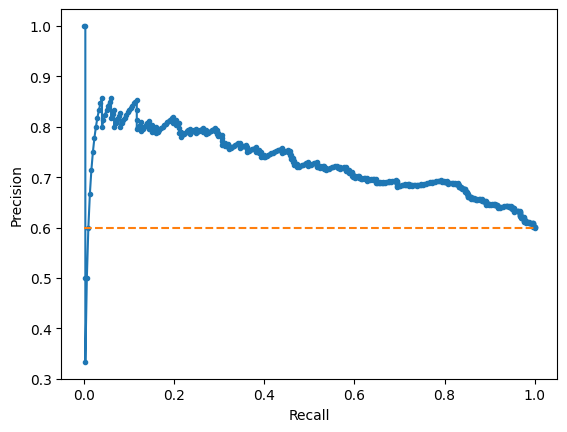

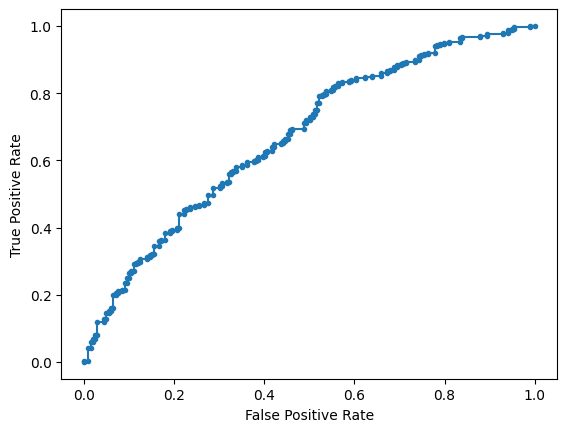

Accuracy: 66.80% Precision: 68.63% Recall: 82.21%
F1: 74.81% MCC: 0.2825
AUPRC: 72.90% AUROC: 66.94%
 accuracy [66.80080482897385]
 precision [68.62745098039215]
 recall [82.21476510067114]
 F1 [74.8091603053435]
 MCC [0.2824849408987746]
 AUPRC [72.89922032946939]
 AUROC [66.94377929918048]

Training # 2 4
2023-04-29 16:46:38.969473
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-3.205141173560679, -0.06858444673447786]
Variances [2.63191713 2.16560902]
Priors [0.47304779 0.52695221]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1016:860 54.16%
Computed class weights: {0: 1.0906976744186045, 1: 0.9232283464566929}
Valid 1:0 259:227 53.29%
FIT


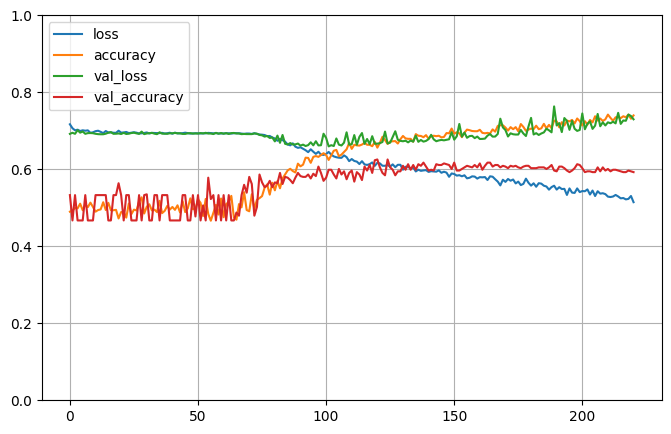


Testing # 2 4
2023-04-29 16:47:53.157513
PREDICT
Test 1:0 259:227 53.29%
Predict 1:0 285:201 58.64%
Test sizes (486, 1025) (486,)
Distrib of scores: 0.55722195 mean 0.16524859 std
Range of scores: 0.033317775 to 0.890602
Score threshold 0.5
Confusion matrix
 [[123 104]
 [ 78 181]]
Normalized matrix
 [[0.25308642 0.21399177]
 [0.16049383 0.37242798]]
Extreme scores correct, pos:neg 100 32
Extreme scores incorrect pos:neg 47 18


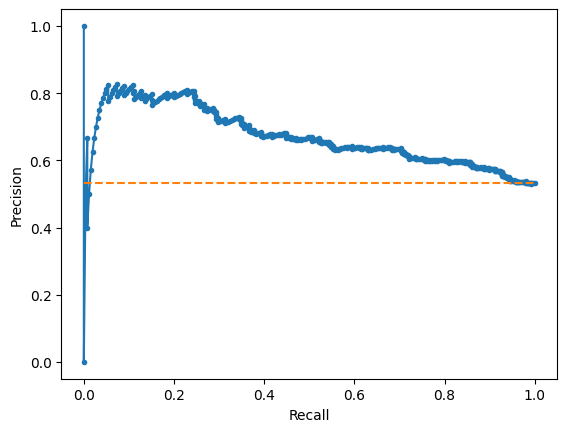

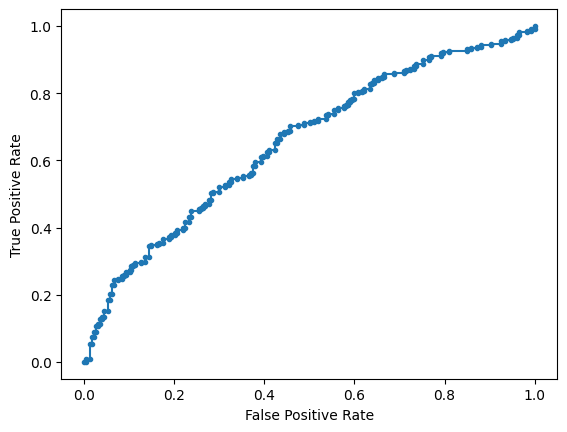

Accuracy: 62.55% Precision: 63.51% Recall: 69.88%
F1: 66.54% MCC: 0.2438
AUPRC: 66.89% AUROC: 65.29%
 accuracy [62.55144032921811]
 precision [63.50877192982456]
 recall [69.88416988416989]
 F1 [66.54411764705883]
 MCC [0.2438393891039982]
 AUPRC [66.88926808109994]
 AUROC [65.29008555440274]

Training # 2 5
2023-04-29 16:47:53.807336
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-3.3112719180135826, -0.16388361777371946]
Variances [2.67828007 2.20649892]
Priors [0.4552959 0.5447041]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 1093:850 56.25%
Computed class weights: {0: 1.1429411764705881, 1: 0.8888380603842635}
Valid 1:0 238:181 56.80%
FIT


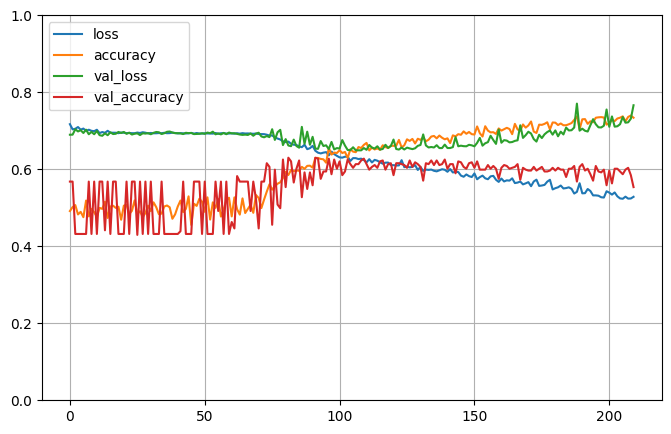


Testing # 2 5
2023-04-29 16:49:18.566455
PREDICT
Test 1:0 238:181 56.80%
Predict 1:0 212:207 50.60%
Test sizes (419, 1025) (419,)
Distrib of scores: 0.5189669 mean 0.15019359 std
Range of scores: 0.14250644 to 0.8740953
Score threshold 0.5
Confusion matrix
 [[116  65]
 [ 91 147]]
Normalized matrix
 [[0.27684964 0.15513126]
 [0.21718377 0.35083532]]
Extreme scores correct, pos:neg 65 38
Extreme scores incorrect pos:neg 20 20


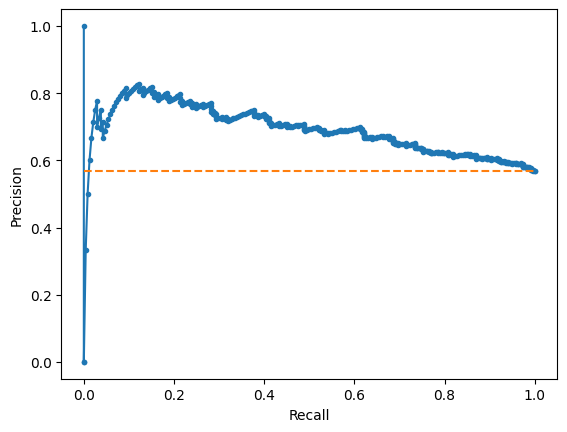

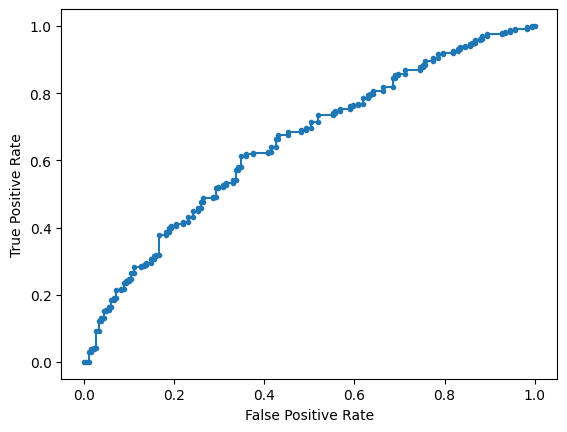

Accuracy: 62.77% Precision: 69.34% Recall: 61.76%
F1: 65.33% MCC: 0.2561
AUPRC: 68.97% AUROC: 65.19%
 accuracy [62.76849642004774]
 precision [69.33962264150944]
 recall [61.76470588235294]
 F1 [65.33333333333333]
 MCC [0.2561458656577854]
 AUPRC [68.97116048654415]
 AUROC [65.18872742467153]
2023-04-29 16:49:19.434319


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 65.12% std 1.74
 precision mean 67.87% std 3.20
 recall mean 71.22% std 8.23
 F1 mean 69.18% std 3.32
 MCC mean 0.2923 std 0.0339
 AUPRC mean 69.40% std 2.77
 AUROC mean 67.06% std 2.02
 accuracy [[64.30107526881721], [65.85365853658537], [64.22594142259415], [64.57399103139014], [65.6964656964657], [66.45962732919256], [67.9245283018868], [66.80080482897385], [62.55144032921811], [62.76849642004774]]
 precision [[69.4560669456067], [71.91489361702128], [63.35616438356164], [65.0], [72.16117216117216], [69.1358024691358], [66.16314199395771], [68.62745098039215], [63.50877192982456], [69.33962264150944]]
 recall [[64.0926640926641], [62.36162361623616], [74.29718875502009], [78.62903225806451], [68.88111888111888], [65.88235294117646], [84.23076923076923], [82.21476510067114], [69.88416988416989], [61.76470588235294]]
 F1 [[66.66666666666666], [66.79841897233202], [68.39186691312385], [71.16788321167884], [70.48300536672629], [67.46987951807229], [74.11167512690355], [74